In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl

/Users/forero/miniforge3/envs/basic/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def find_best_fit(X, Y, robust=True):
    reg = skl.LinearRegression().fit(X, Y)
    return reg.coef_, reg.intercept_, reg.score(X,Y)

In [3]:
def new_data_from_bootstrap(X, Y):
    n = len(Y)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return X[new_ids,:], Y[new_ids]

In [4]:
def bootstrap_results(X, Y, n_bootstrap=100):
    coefs = []
    intercepts = []
    scores = []
    for i in range(n_bootstrap):
        new_X, new_Y = new_data_from_bootstrap(X,Y)
        coef, intercept, score = find_best_fit(new_X, new_Y)
        coefs.append(coef)
        intercepts.append(intercept)
        scores.append(score)
    return np.array(coefs), np.array(intercepts), np.array(scores)

In [5]:
data = pd.read_csv("../data/papers_pop_pib.csv")
papers_col = float(data["Papers"][data["Country"]=="COL"])
pib_col = float(data["PIB"][data["Country"]=="COL"])
pop_col = float(data["Pop"][data["Country"]=="COL"])

print(papers_col, pib_col, pop_col)
ii = data["Papers"]>=papers_col
X = np.array([np.log10(data["PIB"][ii]), np.log10(data["Pop"][ii])])
X = X.T
Y = np.array([np.log10(data["Papers"][ii])])
Y = Y.T
paises = np.array(data["Country"][ii])

reg = skl.LinearRegression().fit(X, Y)
print(reg.coef_, reg.intercept_, reg.score(X,Y))

154.0 318511813577.0 51516562.0
[[ 1.03465838 -0.28241331]] [-6.94236099] 0.7594712931352777


In [29]:
jj = (X[:,0]>(np.log10(pib_col)-0.3))&(X[:,0]<(np.log10(pib_col)+0.3))
jj &= (X[:,1]>(np.log10(pop_col)-0.3))&(X[:,1]<(np.log10(pop_col)+0.3))
print(np.count_nonzero(jj))
paises[jj]
print(np.median(10**Y[jj][0:5]), np.std(10**Y[jj][0:5]), papers_col, 834/154.0, 427/154.0), 
print(Y[jj])

6
427.00000000000017 664.8484338554167 154.0 5.415584415584416 2.772727272727273
[[3.30556631]
 [3.04610479]
 [2.63042788]
 [2.51054501]
 [2.45939249]
 [2.18752072]]


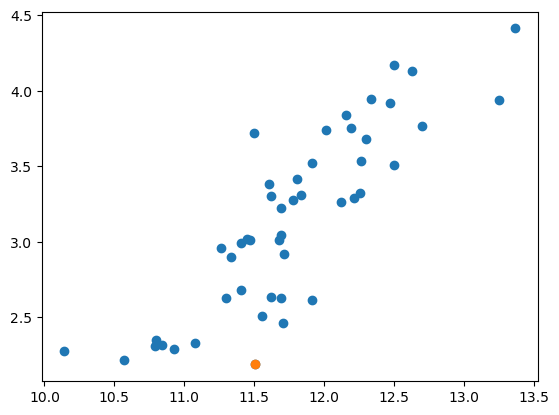

In [29]:
plt.scatter(X[:,0], Y)
plt.scatter(np.log10(pib_col), np.log10(papers_col))

In [30]:
n_bootstrap = 10000
coefs, intercepts, scores = bootstrap_results(X,Y, n_bootstrap=n_bootstrap)

1.0449360472736164 -0.2860754170855142 -7.0353672444511055


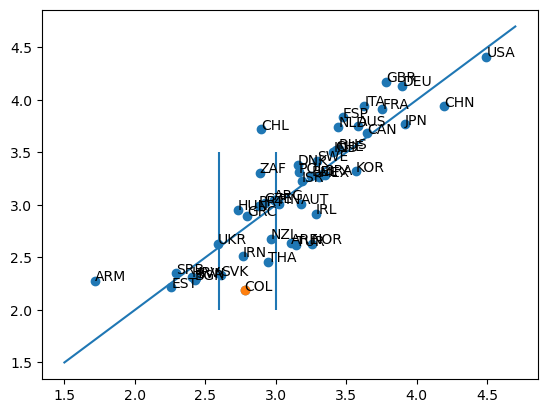

In [31]:
best_coefs = np.mean(coefs, axis=0)
best_intercept = np.mean(intercepts, axis=0)
new_X = best_coefs[0,0]*X[:,0] + best_coefs[0,1]*X[:,1] + best_intercept[0]
n_points = 40
theory_X = np.linspace(1.5, 4.7, n_points)
plt.scatter(new_X, Y)
new_X_col = best_coefs[0,0]*np.log10(pib_col) + best_coefs[0,1]*np.log10(pop_col) + best_intercept[0]
plt.scatter(new_X_col, np.log10(papers_col))
plt.plot(theory_X, theory_X)
print(best_coefs[0,0], best_coefs[0,1], best_intercept[0])
for i, p in enumerate(paises):
    new_X_p = best_coefs[0,0]*X[i,0] + best_coefs[0,1]*X[i,1] + best_intercept[0]
    Y_p = Y[i]
    plt.text(new_X_p, Y_p,p)
#plt.xlim(2.2,3.5)
#plt.ylim(2.0,3.5)
plt.vlines(3, 2.0, 3.5)
plt.vlines(2.6, 2.0, 3.5)

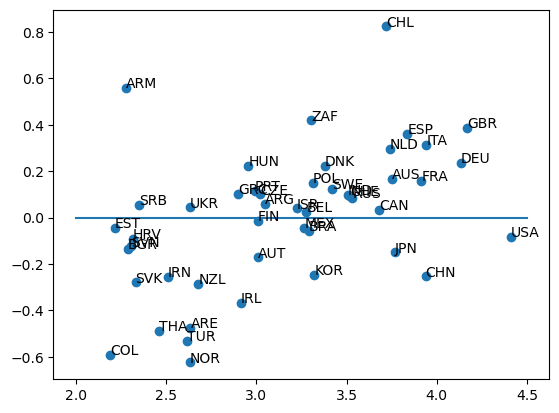

In [34]:
difference = Y[:,0] - new_X
plt.scatter(Y, difference)

for i, p in enumerate(paises):
    Y_p = Y[i]
    diff_p = difference[i]
    plt.text(Y_p, diff_p, p)
    

n_points = 100
x_line = np.linspace(2.0, 4.5, n_points)
z_line = np.zeros(n_points)
plt.plot(x_line, z_line)

In [35]:
Y[:,0]

array([4.41099643, 4.16964505, 4.13203544, 3.94146174, 3.93821942,
       3.9145547 , 3.83581735, 3.76774937, 3.75327657, 3.74138799,
       3.71974549, 3.68250609, 3.53173431, 3.51943419, 3.50582803,
       3.41796964, 3.38075377, 3.32097668, 3.31154196, 3.30556631,
       3.28914284, 3.27715061, 3.26481782, 3.22375545, 3.04610479,
       3.02036128, 3.0094509 , 3.00817418, 2.99211149, 2.95520654,
       2.91539984, 2.897077  , 2.67851838, 2.63447727, 2.63042788,
       2.6294096 , 2.61489722, 2.51054501, 2.45939249, 2.35024802,
       2.33041377, 2.31386722, 2.30749604, 2.28780173, 2.2764618 ,
       2.21484385, 2.18752072])

1.0449360472736136 0.12952005719333412
-0.2860754170855158 0.11747306124385637
-7.0353672444511055 0.8884475941900516


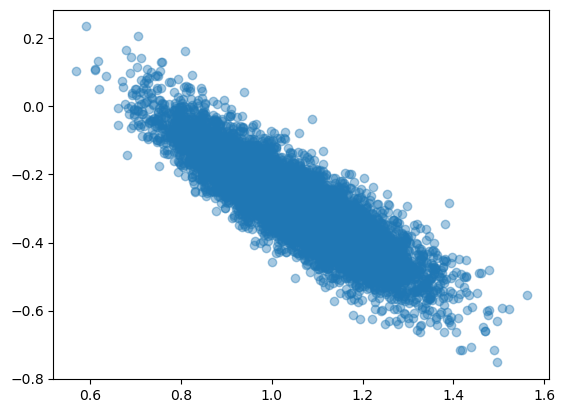

In [36]:
plt.scatter(coefs[:,0,0], coefs[:,0,1], alpha=0.4)
print(np.mean(coefs[:,0,0]), np.std(coefs[:,0,0]))
print(np.mean(coefs[:,0,1]), np.std(coefs[:,0,1]))
print(np.mean(intercepts[:,0]), np.std(intercepts[:,0]))

0.7652934667805065 0.061564662904354125


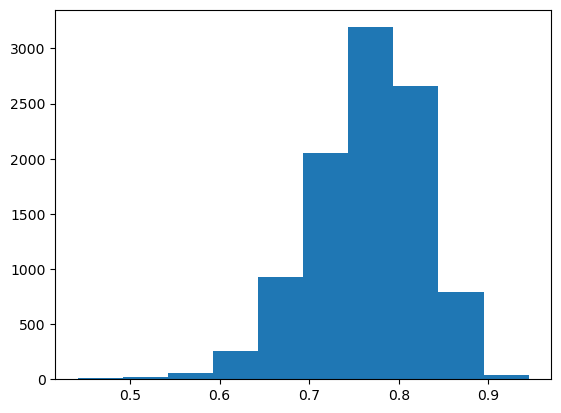

In [37]:
plt.hist(scores)
print(scores.mean(), scores.std())

In [38]:
mean_diff = np.zeros(len(paises))
std_diff = np.zeros(len(paises))
for l, p in enumerate(paises):
    log10_papers = np.zeros(n_bootstrap)
    diff_log10_papers = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        coef_A = coefs[i,0,0]
        coef_B = coefs[i,0,1]
        inter = intercepts[i,0]
        log10_papers[i] = coef_A * X[l,0] + coef_B * X[l,1] + inter
        diff_log10_papers[i] = Y[l]-(log10_papers[i]) 
    mean_diff[l] = np.mean(diff_log10_papers)
    std_diff[l] = np.std(diff_log10_papers)

In [39]:
mean_diff

array([-0.08426207,  0.38519876,  0.23425714,  0.31241932, -0.25401966,
        0.15857532,  0.36058863, -0.14999463,  0.16761873,  0.29653984,
        0.82329759,  0.03287454,  0.08593795,  0.09458114,  0.09836768,
        0.12442549,  0.22236243, -0.24750768,  0.14935684,  0.41912711,
       -0.05855971,  0.02535686, -0.04446338,  0.03944397,  0.05952045,
        0.09994453, -0.17183911, -0.01523892,  0.11436682,  0.22316509,
       -0.36867113,  0.10087837, -0.28705182, -0.47608929,  0.04357593,
       -0.62483843, -0.53167531, -0.2559319 , -0.48784206,  0.055506  ,
       -0.2787846 , -0.09233288, -0.12415738, -0.13620315,  0.55768865,
       -0.04325204, -0.59094415])

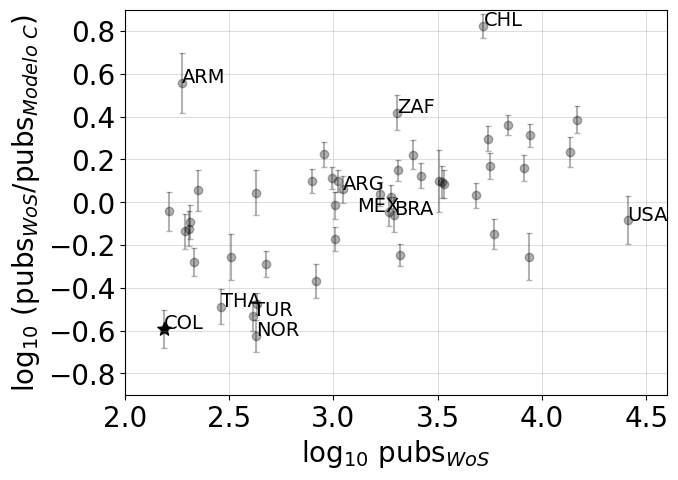

In [40]:
selection = ['COL', 'MEX', 'CHL','ZAF','USA', 'BRA', 'ARG','THA','TUR','ARM','NOR']
plt.figure(figsize=(7,5))
for i, p in enumerate(paises):
    if p in selection:
        if p=='MEX':
            plt.text(Y[i]-0.15, mean_diff[i], p, fontsize=14)
        else:
            plt.text(Y[i], mean_diff[i], p, fontsize=14)
        if p=='COL':
            diff_col = mean_diff[i]
            Y_col = Y[i]
            
plt.errorbar(Y, mean_diff, yerr=std_diff, marker='o', linestyle='none', alpha=0.3, capsize=2,color='black')

plt.scatter(Y_col, diff_col, color='black', s=100, marker='*')

#n_points = 100
#x_line = np.linspace(2.0, 4.6, n_points)
#z_line = np.zeros(n_points)
#plt.plot(x_line, z_line)
plt.xlim(2,4.6)
plt.ylim(-0.9, 0.9)
plt.grid(alpha=0.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\log_{10}$ pubs$_{WoS}$', fontsize=20)
plt.ylabel('$\log_{10}$ (pubs$_{WoS}$/pubs$_{Modelo\ C}$)', fontsize=20)
plt.savefig('pubs_modelo.jpg', bbox_inches='tight')

In [42]:
10**0.6

3.9810717055349722

In [43]:
ratio = 10**(log10_papers)/ papers_col
print(ratio.mean(), ratio.std())

3.982659429997955 0.8344609120499287


In [75]:
# Crear un DataFrame con los datos
datos = np.column_stack((Y, X[:,0], X[:,1]))
columnas = ['Y', 'X_1', 'X_2']
df = pd.DataFrame(datos, columns=columnas)

# Ajustar el modelo de regresión MM
modelo = smf.rlm('Y ~ X_1 + X_2', data=df, M=sm.robust.norms.TukeyBiweight()).fit()

# Nuevos valores para realizar predicciones
nuevos_datos = pd.DataFrame({'X_1': [np.log10(pib_col)], 'X_2': [np.log10(pop_col)]})

# Realizar predicciones
predicciones = modelo.predict(nuevos_datos)


# Imprimir los resultados
print(modelo.summary())
print(10**(predicciones-np.log10(papers_col)))


                    Robust linear Model Regression Results                    
Dep. Variable:                      Y   No. Observations:                   47
Model:                            RLM   Df Residuals:                       44
Method:                          IRLS   Df Model:                            2
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 09 May 2024                                         
Time:                        05:49:16                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.3652      0.880     -8.367      0.0

In [72]:
# Crear un DataFrame con los datos
datos = np.column_stack((Y, X[:,0], X[:,1]))
columnas = ['Y', 'X_1', 'X_2']
df = pd.DataFrame(datos, columns=columnas)

# Ajustar el modelo de regresión OLS
modelo = sm.OLS(df['Y'], sm.add_constant(df[['X_1', 'X_2']])).fit()

# Nuevos valores para realizar predicciones
nuevos_datos = pd.DataFrame({'X_1': [np.log10(pib_col)], 'X_2': [np.log10(pop_col)]})

# Realizar predicciones
nuevos_datos_con_constante = nuevos_datos.copy()  # Hacer una copia del DataFrame
nuevos_datos_con_constante['const'] = 1.0
nuevos_datos_con_constante = nuevos_datos_con_constante[['const', 'X_1', 'X_2']]
#datos_constante = sm.add_constant(nuevos_datos)
predicciones = modelo.predict(nuevos_datos_con_constante)

# Imprimir los resultados
print(modelo.summary())
print(10**(predicciones-np.log10(papers_col)))
print(modelo.bic)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     69.47
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.43e-14
Time:                        05:23:20   Log-Likelihood:                -8.9474
No. Observations:                  47   AIC:                             23.89
Df Residuals:                      44   BIC:                             29.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9424      0.864     -8.039      0.0

In [73]:
# Crear un DataFrame con los datos
datos = np.column_stack((Y, X[:,0]))
columnas = ['Y', 'X_1']
df = pd.DataFrame(datos, columns=columnas)

# Ajustar el modelo de regresión OLS
modelo = sm.OLS(df['Y'], sm.add_constant(df[['X_1']])).fit()

print(modelo.bic)

32.02868422299813


In [74]:
# Crear un DataFrame con los datos
datos = np.column_stack((Y, X[:,1]))
columnas = ['Y', 'X_2']
df = pd.DataFrame(datos, columns=columnas)

# Ajustar el modelo de regresión OLS
modelo = sm.OLS(df['Y'], sm.add_constant(df[['X_2']])).fit()

print(modelo.bic)

73.55797732492675


In [64]:
print(nuevos_datos)
print(datos_constante)

         X_1       X_2
0  11.503126  7.711947
         X_1       X_2
0  11.503126  7.711947


In [65]:
sm.add_constant(nuevos_datos)

,X_1,X_2
0,11.503126,7.711947


In [66]:
sm.add_constant(df[['X_1', 'X_2']])

,const,X_1,X_2
0,1.0,13.367637,8.521179
1,1.0,12.497138,7.826245
2,1.0,12.631292,7.920103
3,1.0,12.333520,7.771831
4,1.0,13.250919,9.154077
5,1.0,12.471197,7.831001
6,1.0,12.160064,7.675923
7,1.0,12.699451,8.099272
8,1.0,12.192856,7.409687
9,1.0,12.012702,7.243857


In [47]:
print(np.mean(coefs[:,0,0]), np.std(coefs[:,0,0]))
print(np.mean(coefs[:,0,1]), np.std(coefs[:,0,1]))
print(np.mean(intercepts[:,0]), np.std(intercepts[:,0]))

1.0449360472736136 0.12952005719333412
-0.2860754170855158 0.11747306124385637
-7.0353672444511055 0.8884475941900516
